**Sample ID**: CM168_base


**Query**:

Has the trash been picked up yet? Send me an email at John1223@gmail.com if the pickup has occurred so I can bring in the bins.


**DB Type**: Base Case


**Case Description**:

The system initiates a check of the alley area using the alley camera. The footage shows a garbage truck in front of the house and emptying the bins. This confirms that the trash has been picked up. An email is then sent at  John1223@gmail.com to notify the user that the pickup has occurred so the bins can be brought back in.


**Global/Context Variables:**
- recipient_email = "John1223@gmail.com"

**APIs:**
- sdm
- gmail

# Set Up

## Download relevant files

In [1]:
import io
import os
import sys
import zipfile
import shutil
import re
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

VERSION = "0.1.4"  # Pass the version of the API
CONTENT_DIR = '/content'
APIS_DIR = os.path.join(CONTENT_DIR, 'APIs')
DBS_DIR = os.path.join(CONTENT_DIR, 'DBs')
SCRIPTS_DIR = os.path.join(CONTENT_DIR, 'Scripts')
FC_DIR = os.path.join(CONTENT_DIR, 'Schemas')
ZIP_PATH = os.path.join(CONTENT_DIR, f'APIs_V{VERSION}.zip')

APIS_FOLDER_ID = '1QpkAZxXhVFzIbm8qPGPRP1YqXEvJ4uD4'
ITEMS_TO_EXTRACT = ['APIs/', 'DBs/', 'Scripts/', 'Schemas/']

# Cleanup
for path in [APIS_DIR, DBS_DIR, SCRIPTS_DIR, FC_DIR, ZIP_PATH]:
    if os.path.exists(path):
        if os.path.isdir(path):
            shutil.rmtree(path)
        else:
            os.remove(path)

# Auth
auth.authenticate_user()
drive_service = build('drive', 'v3')

def download_drive_file(service, file_id, output_path, file_name=None, show_progress=True):
    request = service.files().get_media(fileId=file_id)
    with io.FileIO(output_path, 'wb') as fh:
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
            if show_progress:
                print(f"Download progress: {int(status.progress() * 100)}%")

print(f"Searching for APIs zip file with version {VERSION} in folder: {APIS_FOLDER_ID}...")
apis_file_id = None
try:
    query = f"'{APIS_FOLDER_ID}' in parents and trashed=false"
    results = drive_service.files().list(q=query, fields="files(id, name)").execute()
    for file in results.get('files', []):
        if file['name'].lower() == f'apis_v{VERSION.lower()}.zip':
            apis_file_id = file['id']
            print(f"Found: {file['name']} (ID: {apis_file_id})")
            break
except Exception as e:
    print(f"Error listing files: {e}")

if not apis_file_id:
    sys.exit(f"❌ APIs zip V{VERSION} not found.")

print(f"Downloading APIs zip {apis_file_id}...")
download_drive_file(drive_service, apis_file_id, ZIP_PATH)

print(f"Extracting {ZIP_PATH}...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if any(member.startswith(p) for p in ITEMS_TO_EXTRACT):
            zip_ref.extract(member, CONTENT_DIR)

os.remove(ZIP_PATH)

if os.path.exists(APIS_DIR):
    sys.path.append(APIS_DIR)

for p in [APIS_DIR, DBS_DIR, SCRIPTS_DIR]:
    print(f"{'✅' if os.path.exists(p) else '❌'} {p}")

# PWS: Copy pws_image_data folder in /content/pws_image_data
print(f"\nDownloading all files from pws_images_data Drive folder.")
IMAGES_ZIP_ID = '1MlgE9LnFA221ARh9l4nbF1yGc215KDN_'
IMAGES_ZIP_PATH = os.path.join(CONTENT_DIR, 'pws_images_data.zip')
download_drive_file(drive_service, IMAGES_ZIP_ID, IMAGES_ZIP_PATH, file_name='pws_images_data.zip')

print(f"Extracting images from {IMAGES_ZIP_PATH} to {CONTENT_DIR}...")
try:
    with zipfile.ZipFile(IMAGES_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(CONTENT_DIR)

except zipfile.BadZipFile:
    print(f"Error: The downloaded file at {IMAGES_ZIP_PATH} is not a valid zip file.")
    sys.exit("Invalid zip file downloaded.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")
    sys.exit("Extraction failed.")

if os.path.exists(IMAGES_ZIP_PATH):
    os.remove(IMAGES_ZIP_PATH)

Searching for APIs zip file with version 0.1.4 in folder: 1QpkAZxXhVFzIbm8qPGPRP1YqXEvJ4uD4...
Found: APIs_V0.1.4.zip (ID: 1TnAaWGfVrMxWTilyhy46-Aue_bh0XkNk)
Download progress: 100%
Extracting /content/APIs_V0.1.4.zip...
✅ /content/APIs
✅ /content/DBs
✅ /content/Scripts

Download progress: 78%
Download progress: 100%
Extracting images from /content/pws_images_data.zip to /content...


## Install Dependencies and Clone Repositories

In [2]:
!pip install uv
!uv pip install -r /content/APIs/requirements.txt
!uv pip install jsonpath_ng

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 50.2 MB/s eta 0:00:00
Using Python 3.12.12 environment at: /usr
Resolved 161 packages in 3.44s
Prepared 57 packages in 4.96s
Uninstalled 15 packages in 71ms
Installed 57 packages in 131ms
 + anthropic==0.69.0
 - beautifulsoup4==4.13.5
 + beautifulsoup4==4.13.4
 + bracex==2.6
 + coverage==7.8.0
 + cssselect==1.3.0
 + deepdiff==8.6.0
 + dnspython==2.8.0
 + docopt==0.6.2
 - docstring-parser==0.17.0
 + docstring-parser==0.16
 - duckdb==1.3.2
 + duckdb==1.3.0
 + email-validator==2.2.0
 + ete3==3.1.3
 + freezegun==1.5.2
 - google-genai==1.41.0
 + google-genai==1.38.0
 + jedi==0.19.2
 + json-repair==0.44.1
 + jsonpath-ng==1.7.0
 + langchain-anthropic==0.3.19
 + langchain-openai==0.3.30
 + levenshtein==0.27.1
 + libcst==1.8.2
 + lxml-html-clean==0.4.3
 - mcp==1.16.0
 + mcp==1.12.4
 + mermaid-python==0.1
 + mongomock==4.3.0
 - openpyxl==3.1.5
 + openpyxl==3.1.2
 + orderly-set==5.5.0
 + phonenumbers==9.0.12
 + playwright==1.52.0
 + portalo

## Import APIs and initiate DBs

In [14]:
scenario_db = {
    'environment': {
        'home_assistant': {
            'devices': {
                'LIGHT_001': {
                    'attributes': {
                        'brightness': 1.0,
                        'company': 'Crompton',
                        'model': '4Ft.22W',
                        'serial_number': 'C907890',
                        'state': 'Off',
                        'supports_color': 'No'
                    },
                    'name': 'Living Room Light 1',
                    'type': 'Light'
                },
                'LIGHT_002': {
                    'attributes': {
                        'brightness': 1.0,
                        'company': 'Crompton',
                        'model': '4Ft.22W',
                        'serial_number': 'C847116',
                        'state': 'Off',
                        'supports_color': 'No'
                    },
                    'name': 'Living Room Light 2',
                    'type': 'Light'
                },
                'LIGHT_003': {
                    'attributes': {
                        'brightness': 0.8,
                        'company': 'Crompton',
                        'model': '3Ft.15W',
                        'serial_number': 'C170567',
                        'state': 'On',
                        'supports_color': 'No'
                    },
                    'name': 'Kitchen Light',
                    'type': 'Light'
                },
                'LIGHT_004': {
                    'attributes': {
                        'brightness': 1.0,
                        'color': '#FFFFFF',
                        'company': 'Crompton Multi-Color',
                        'model': '4Ft.22W - 3 in 1',
                        'serial_number': 'C956341',
                        'state': 'Off',
                        'supports_color': 'Yes'
                    },
                    'name': 'Guest Room Light',
                    'type': 'Light'
                },
                'LIGHT_005': {
                    'attributes': {
                        'brightness': 1.0,
                        'color': '#FFFFFF',
                        'company': 'Crompton Multi-Color',
                        'model': '4Ft.22W - 3 in 1',
                        'serial_number': 'C9563571',
                        'state': 'Off',
                        'supports_color': 'Yes'
                    },
                    'name': 'Study Room Light',
                    'type': 'Light'
                }
            }
        },
        'sdm': {
            'devices': {
                'CAM_001': {
                    'attributes': {
                        'company': 'Google',
                        'model': 'Google Nest Cam Indoor',
                        'parent': 'enterprises/house-system-136791/structures/STRCT2/rooms/ROOM1',
                        'serial_number': 'GNC-I-29000',
                        'state': 'On'
                    },
                    'name': 'Living Room Cam',
                    'type': 'Camera'
                },
                'CAM_002': {
                    'attributes': {
                        'company': 'Google',
                        'model': 'Google Nest Cam Indoor',
                        'parent': 'enterprises/house-system-136791/structures/STRCT2/rooms/ROOM2',
                        'serial_number': 'GNC-I-880000',
                        'state': 'On'
                    },
                    'name': 'Kitchen Cam',
                    'type': 'Camera'
                },
                'CAM_003': {
                    'attributes': {
                        'company': 'Google',
                        'model': 'Google Nest Cam IQ Outdoor',
                        'parent': 'enterprises/house-system-136791/structures/STRCT1/rooms/OUT1',
                        'serial_number': 'GNC-O-880000',
                        'state': 'On'
                    },
                    'name': 'Alley Cam',
                    'type': 'Camera'
                }
            },
            'structures': [
                {
                    'name': 'enterprises/house-system-136791/structures/STRCT1',
                    'traits': {
                        'sdm.structures.traits.Info': {
                            'customName': 'House - Outdoors'
                        }
                    }
                },
                {
                    'name': 'enterprises/house-system-136791/structures/STRCT2',
                    'traits': {
                        'sdm.structures.traits.Info': {
                            'customName': 'House - Indoors'
                        }
                    }
                }
            ]
        }
    },
    'project_id': 'house-system-136791'
}

image_map = {
    'cameras': {
        'CAM_001': [{'expected': 'No', 'image_path': './pws_image_data/05_16_25 22_01.jpg'}],
        'CAM_002': [{'expected': 'No', 'image_path': './pws_image_data/2025-05-23_1348_cam.jpg'}],
        'CAM_003': [{'expected': 'Yes', 'image_path': './pws_image_data/05_20_25 8_29_12 AM.JPG'}]
    },
    'events': []
}


import json
import os
import gmail
import sdm

# Save scenario and image map data to JSON files
with open("/content/scenario_db.json", "w") as f:
    json.dump(scenario_db, f)

with open("/content/image_map.json", "w") as f:
    json.dump(image_map, f)

# Initialize databases
gmail.SimulationEngine.db.load_state("/content/DBs/GmailDefaultDB.json")
sdm.SimulationEngine.db.load_state("/content/scenario_db.json")

# Print loaded databases
print(f"SDM DB: {sdm.SimulationEngine.db.DB}")
print(f"Gmail DB: {gmail.SimulationEngine.db.DB}")

# Load the image map for this task
with open("/content/image_map.json", "r") as f:
    image_map = json.load(f)

# Print the image map
print(f"Image Map: {image_map}")

# Reset simulation states
sdm.devices.commands.reset_served_images()
sdm.SimulationEngine.db.reset_state_env()

# Initialize the image map in the simulation state
sdm.SimulationEngine.db.update_state_dict(image_map)

# Set camera events using the image map
sdm.SimulationEngine.events.set_cameras_events(
    image_map,
    sdm.SimulationEngine.db.DB.get("project_id", "")
)


SDM DB: {'environment': {'home_assistant': {'devices': {'LIGHT_001': {'attributes': {'brightness': 1.0, 'company': 'Crompton', 'model': '4Ft.22W', 'serial_number': 'C907890', 'state': 'Off', 'supports_color': 'No'}, 'name': 'Living Room Light 1', 'type': 'Light'}, 'LIGHT_002': {'attributes': {'brightness': 1.0, 'company': 'Crompton', 'model': '4Ft.22W', 'serial_number': 'C847116', 'state': 'Off', 'supports_color': 'No'}, 'name': 'Living Room Light 2', 'type': 'Light'}, 'LIGHT_003': {'attributes': {'brightness': 0.8, 'company': 'Crompton', 'model': '3Ft.15W', 'serial_number': 'C170567', 'state': 'On', 'supports_color': 'No'}, 'name': 'Kitchen Light', 'type': 'Light'}, 'LIGHT_004': {'attributes': {'brightness': 1.0, 'color': '#FFFFFF', 'company': 'Crompton Multi-Color', 'model': '4Ft.22W - 3 in 1', 'serial_number': 'C956341', 'state': 'Off', 'supports_color': 'Yes'}, 'name': 'Guest Room Light', 'type': 'Light'}, 'LIGHT_005': {'attributes': {'brightness': 1.0, 'color': '#FFFFFF', 'company

# Initial Assertion
1. Assert that no email has been sent to "John1223@gmail.com".

In [15]:
import gmail

# Context variable
recipient_email = "John1223@gmail.com"

# Construct Gmail search query
query = f'to:{recipient_email}'

# List matching messages
list_of_emails = gmail.list_messages(userId="me", q=query)

# 1. Assert that no email has been sent to "John1223@gmail.com".
# Use .get(..., []) to avoid TypeError if 'messages' key is missing
email_messages = list_of_emails.get("messages", [])
assert len(email_messages) == 0, (
    f"There are {len(email_messages)} emails sent to {recipient_email}"
)


# Action
* Locate the Alley camera.
* Access footage "05:20:25 8_29_12 AM"
* This camera shows a garbage truck, confirming that trash pickup has occurred.
* Send an email to John1223@gmail.com with the message, "Trash pickup has been completed."

In [16]:
import gmail
import sdm
from IPython.display import Image, display
import base64

def display_base64_image(image_base64):
    """Helper function to display a base 64 image"""
    base64_string = image_base64.split(':')[1].strip()

    try:
        missing_padding = len(base64_string) % 4
        if missing_padding:
            base64_string += '=' * (4 - missing_padding)
        image_data = base64.b64decode(base64_string)
    except Exception as e:
        print(f"Error decoding base64 string: {e}")
        image_data = None

    if image_data:
        display(Image(data=image_data))

# Context variables
recipient_email = "John1223@gmail.com"

# List all sdm devices
sdm_devices = sdm.list_devices()
print(f"All available SDM devices: {sdm_devices}")

All available SDM devices: {'devices': [{'name': 'enterprises/house-system-136791/devices/CAM_001', 'type': 'sdm.devices.types.CAMERA', 'traits': {'sdm.devices.traits.CameraEventImage': {}, 'sdm.devices.traits.CameraImage': {'maxImageResolution': {'width': 1280, 'height': 960}}, 'sdm.devices.traits.CameraLiveStream': {'maxVideoResolution': {'width': 640, 'height': 480}, 'videoCodecs': ['H264'], 'audioCodecs': ['AAC'], 'supportedProtocols': ['RTSP', 'WEB_RTC']}, 'sdm.devices.traits.CameraMotion': {}, 'sdm.devices.traits.CameraPerson': {}, 'sdm.devices.traits.CameraSound': {}, 'sdm.devices.traits.Info': {'customName': 'Living Room Cam'}}, 'project_id': 'house-system-136791', 'parentRelations': [{'parent': 'enterprises/house-system-136791/structures/STRCT2/rooms/ROOM1', 'displayName': 'Living Room Cam'}]}, {'name': 'enterprises/house-system-136791/devices/CAM_002', 'type': 'sdm.devices.types.CAMERA', 'traits': {'sdm.devices.traits.CameraEventImage': {}, 'sdm.devices.traits.CameraImage': {

In [17]:
# Set required ids

# Assuming "Alley Cam" is the Alley Camera
alley_cam_id = "CAM_003"
project_id = "house-system-136791"

# 2. Load front door cam image
# Start RTSP stream
generate_stream_command = {"command": "sdm.devices.commands.generate_rtsp_stream",
                           "params": {}
                           }
generate_stream_output = sdm.execute_command(device_id=alley_cam_id, project_id=project_id, command_request=generate_stream_command)

# Inspect stream output
print(f"Generated stream output: {generate_stream_output}")

Generated stream output: {'results': {'streamUrls': {'rtspUrl': 'rtsps://sdmvideostream.com/Zy4wLnN0cmVhbWluZ1Rva2VuLi9wd3NfaW1hZ2VfZGF0YS8wNV8yMF8yNSA4XzI5XzEyIEFNLkpQRw==?auth=g.0.streamingToken'}, 'streamExtensionToken': 'OjbS9JiXSk6jJl3iu1HwhA', 'streamToken': 'g.0.streamingToken', 'expiresAt': '2025-10-14T11:54:36.646508'}}


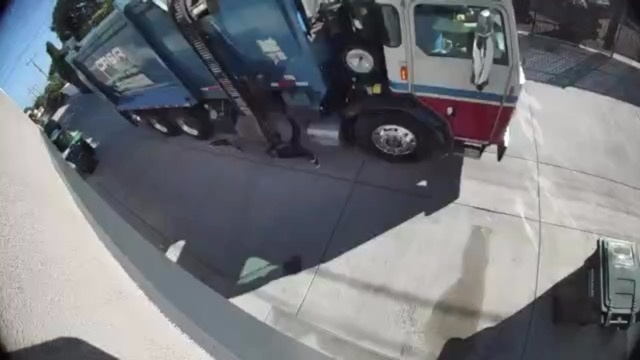

In [18]:
# Get image from stream
generate_image_command = {"command": "sdm.devices.commands.generate_image_from_rtsp_stream",
                          "params": {
                              "rtsp_url": generate_stream_output.get("results", {}).get("streamUrls", "").get("rtspUrl", "")
                              }
                          }
image_1 = sdm.execute_command(device_id=alley_cam_id, project_id=project_id, command_request=generate_image_command)

# Stop RTSP stream
stop_stream_command = {"command": "sdm.devices.commands.stop_rtsp_stream",
                       "params": {
                           "stream_extension_token": generate_stream_output.get("results", {}).get("streamExtensionToken", "")
                           }
                       }
stop_stream_output = sdm.execute_command(device_id=alley_cam_id, project_id=project_id, command_request=stop_stream_command)

# THIS IS JUST FOR DEBUGGING, WILL BE REMOVED
display_base64_image(image_1)

In [19]:
# Mock reply from Gemini
print("This image shows a garbage truck, confirming that trash pickup has occurred. I will send an email for confirmation.")

This image shows a garbage truck, confirming that trash pickup has occurred. I will send an email for confirmation.


In [20]:
# Sending email
sender_email = gmail.get_user_profile("me").get("emailAddress", "")
subject = "Trash Pick-Up Update"
message_text = (
    "Hi,\n\n"
    "Trash pickup has been completed.\n"
)

# Message Dictionary
msg_dictionary = {
    'sender': sender_email,
    'recipient': recipient_email,
    'subject': subject,
    'body': message_text
}

# Send the Email
sent_email = gmail.send_message(userId="me", msg=msg_dictionary)

print("Email sent successfully. Details:")
print(sent_email)

Email sent successfully. Details:
{'id': 'msg_5', 'threadId': 'thread-5', 'labelIds': ['SENT'], 'raw': 'Q29udGVudC1UeXBlOiB0ZXh0L3BsYWluOyBjaGFyc2V0PSJ1cy1hc2NpaSIKTUlNRS1WZXJzaW9uOiAxLjAKQ29udGVudC1UcmFuc2Zlci1FbmNvZGluZzogN2JpdApUbzogSm9objEyMjNAZ21haWwuY29tClN1YmplY3Q6IFRyYXNoIFBpY2stVXAgVXBkYXRlCkZyb206IGpvaG4uZG9lQGdtYWlsLmNvbQoKSGksCgpUcmFzaCBwaWNrdXAgaGFzIGJlZW4gY29tcGxldGVkLgo', 'internalDate': '1760442581729', 'date': '', 'sender': 'john.doe@gmail.com', 'recipient': 'John1223@gmail.com', 'subject': 'Trash Pick-Up Update', 'body': 'Hi,\n\nTrash pickup has been completed.\n', 'payload': {'mimeType': 'text/plain', 'headers': [{'name': 'From', 'value': 'john.doe@gmail.com'}, {'name': 'To', 'value': 'John1223@gmail.com'}, {'name': 'Subject', 'value': 'Trash Pick-Up Update'}, {'name': 'Date', 'value': ''}], 'body': {'data': 'SGksCgpUcmFzaCBwaWNrdXAgaGFzIGJlZW4gY29tcGxldGVkLgo='}}, 'headers': [{'name': 'From', 'value': 'john.doe@gmail.com'}, {'name': 'To', 'value': 'John1223@gmail.co

# Final Assertion
1. Assert that the email was sent to John1223@gmail.com
2. Assert that all the relevant images are utilzed.

In [21]:
import gmail
import sdm
from Scripts.assertions_utils import *

# Context variables
recipient_email = "John1223@gmail.com"

# Helper functions
def are_all_images_used(expected_paths: list[str], served_type: str) -> bool:
    """Helper to check if all expected images were utilized"""
    # Get served images
    served_image_paths = sdm.devices.commands.get_served_images()

    if compare_strings(served_type, "event"):
        image_paths = served_image_paths.get("EVENT_IMAGES", [])
    elif compare_strings(served_type, "stream"):
        image_paths = served_image_paths.get("STREAM_IMAGES", [])
    else:
        print("Invalid served type.")
        return False

    # Handle empty expected list
    if not expected_paths:
        return True

    # Compare subset using utility function
    return compare_is_list_subset(expected_paths, image_paths, list_comparison_function="all")

# 1. Assert that the email was sent to the recipient
list_result = gmail.list_messages(userId="me", q=f"to:{recipient_email}")
messages = list_result.get("messages", [])

# Wrap to avoid non-assertion errors if messages list is empty
labels = []
if len(messages) == 1:
    try:
        labels = gmail.get_message(userId="me", id=messages[0]["id"], format="metadata").get("labelIds", [])
    except Exception as e:
        labels = []
        print(f"Error fetching message labels: {e}")

# Use robust string and condition checks
assert len(messages) == 1 and compare_is_list_subset(["SENT"], labels, list_comparison_function="any"), (
    f"Verification failed. Found {len(messages)} emails for {recipient_email} "
    f"(expected 1 with 'SENT' label)."
)

# 2. Assert that all the relevant images are utilized.
image_map = sdm.load_image_map()
all_expected_paths = []
camera_image_entries = image_map.get("cameras", {})
event_image_entries = image_map.get("events", [])

for _, image_entries in camera_image_entries.items():
    for entry in image_entries:
        if compare_strings(entry.get("expected"), "Yes"):
            all_expected_paths.append(entry.get("image_path"))

expected_event_paths = [event.get("image_path") for event in event_image_entries]
expected_stream_paths = [path for path in all_expected_paths if path not in expected_event_paths]

# Validate that all images were used
assert are_all_images_used(expected_event_paths, "event"), "Mismatch: Not all expected event images were used."
assert are_all_images_used(expected_stream_paths, "stream"), "Mismatch: Not all expected stream images were used."
